In [13]:
library(knitr)
library(sqldf)
library(ggplot2)
library(mongolite)
library(ggplot2)
library(gridExtra)
library(dplyr)
library(tidyr)
library(jsonlite)
library(lubridate)
library(gridExtra)
library(GGally)
library(scales)
library(memisc)
 library(sp)
library(rgeos)
library(rgdal)
library(maptools)
library(RColorBrewer)
library(maps)
library(grid)
library(cluster)
#library(clue)
#library(StatMatch)
library(fastcluster)
library(factoextra)
library(FactoMineR)
library(stringr)
library(googleVis)
library(RMySQL)
library(data.table)
library(dbplyr)
library(DBI)
library(httr)
library(scanstatistics)
library(purrr)
library(magrittr)
library(rsatscan)
library(MASS)
library(readr)
library(caret)
library(fitdistrplus)
library(pscl)
library(car)
library(AUC)
library(ROCR)
library(forecast)
library(xts)
library(tseries)
#.libPaths(c(file.path(Sys.getenv('SPARK_HOME'), 'R', 'lib'), .libPaths())

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite

Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date


Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa

Loading required package: lattice
Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select


Attaching package: 'memisc'

The following object is masked from 'package:scales':

    percent

The following object is masked from 'package:lubridate':

    is.interval

The following objects are masked from 'package:dplyr':

    collect, recode, rename, syms

The following objec

In [81]:
plot.format <- theme(axis.text = element_text(size = 12), legend.text = element_text(size = 12), legend.title = element_text(size = 12), axis.title = element_text(size = 14), plot.title = element_text(size = 14))

In [2]:
airline_all_df <- read.csv("../../data/interim/airline_all_df.csv")

In [3]:
nrow(airline_all_df)

[1] 14914

In [4]:
airline_all_df$X <- NULL
summary(airline_all_df)

    tweet_id         airline_sentiment airline_sentiment_confidence
 Min.   :5.676e+17   negative:9356     Min.   :0.3350              
 1st Qu.:5.686e+17   neutral :3149     1st Qu.:0.6925              
 Median :5.695e+17   positive:2409     Median :1.0000              
 Mean   :5.692e+17                     Mean   :0.9004              
 3rd Qu.:5.699e+17                     3rd Qu.:1.0000              
 Max.   :5.703e+17                     Max.   :1.0000              
                                                                   
                negativereason negativereason_confidence           airline    
                       :5558   Min.   :0.000             American      :3033  
 Customer Service Issue:2961   1st Qu.:0.361             Delta         :2222  
 Late Flight           :1690   Median :0.670             Southwest     :2420  
 Can't Tell            :1209   Mean   :0.639             United        :3822  
 Cancelled Flight      : 878   3rd Qu.:1.000             US A

In [5]:
colnames(airline_all_df)

[1] "X"                            "tweet_id"                    
 [3] "airline_sentiment"            "airline_sentiment_confidence"
 [5] "negativereason"               "negativereason_confidence"   
 [7] "airline"                      "airline_sentiment_gold"      
 [9] "name"                         "negativereason_gold"         
[11] "retweet_count"                "text"                        
[13] "tweet_coord"                  "tweet_created"               
[15] "tweet_location"               "user_timezone"               
[17] "text_hashtags"                "text_nohash_cap_punc"        
[19] "text_no_punc_num"             "text_lowercase_only"         
[21] "doc"                          "class"                       
[23] "text_hashtags_sent"           "text_hashtags_tokens"        
[25] "text_nohash_cap_punc_sent"    "text_nohash_cap_punc_tokens" 
[27] "text_no_punc_num_sent"        "text_no_punc_num_tokens"     
[29] "text_lowercase_only_sent"     "text_lowercase_only_tokens"  
[31] "sentiment"

In [9]:
airline_nontext_df <- read.csv("../../data/interim/airline_nontext_df.csv")

In [10]:
airline_nontext_df$X <- NULL

In [28]:
nrow(airline_nontext_df)
summary(airline_nontext_df)

[1] 14640

    tweet_id         airline_sentiment airline_sentiment_confidence
 Min.   :5.676e+17   negative:9178     Min.   :0.3350              
 1st Qu.:5.686e+17   neutral :3099     1st Qu.:0.6923              
 Median :5.695e+17   positive:2363     Median :1.0000              
 Mean   :5.692e+17                     Mean   :0.9002              
 3rd Qu.:5.699e+17                     3rd Qu.:1.0000              
 Max.   :5.703e+17                     Max.   :1.0000              
                                                                   
                negativereason negativereason_confidence           airline    
 Unknown               :5462   Min.   :0.000             American      :2759  
 Customer Service Issue:2910   1st Qu.:0.361             Delta         :2222  
 Late Flight           :1665   Median :0.671             Southwest     :2420  
 Can't Tell            :1190   Mean   :0.638             United        :3822  
 Cancelled Flight      : 847   3rd Qu.:1.000             US A

In [27]:
colnames(airline_nontext_df)

[1] "tweet_id"                     "airline_sentiment"           
 [3] "airline_sentiment_confidence" "negativereason"              
 [5] "negativereason_confidence"    "airline"                     
 [7] "airline_sentiment_gold"       "name"                        
 [9] "negativereason_gold"          "retweet_count"               
[11] "tweet_coord"                  "tweet_created"               
[13] "tweet_location"               "user_timezone"               
[15] "gold"                         "tweet_created_dt"            
[17] "date"                         "day"                         
[19] "month"                        "year"                        
[21] "time"                         "hour"                        
[23] "sentiment"                    "class"

In [14]:
airline_nontext_df$sentiment <- airline_nontext_df$airline_sentiment

In [15]:
airline_nontext_df <- airline_nontext_df %>%
                        mutate(class = ifelse(sentiment == "negative", 0, ifelse(sentiment == "neutral", 1, 2))) %>%
                        as.data.frame()

In [16]:
sent_airline_hour <- airline_nontext_df %>% dplyr::select(hour, airline, sentiment) %>%
                        group_by(sentiment,hour, airline) %>%
                            dplyr::summarise(no_of_text = n()) %>%
                        as.data.frame()


In [46]:
sent_airline_hour  

sentiment,hour,airline,no_of_text
negative,0,American,34
negative,0,Delta,6
negative,0,Southwest,4
negative,0,United,37
negative,0,US Airways,15
negative,0,Virgin America,1
negative,1,American,28
negative,1,Delta,2
negative,1,Southwest,5
negative,1,United,23


In [ ]:
ungroup(airline) %>%
                        dplyr::summarise(mean_sentiment = mean(no_of_text)) %>

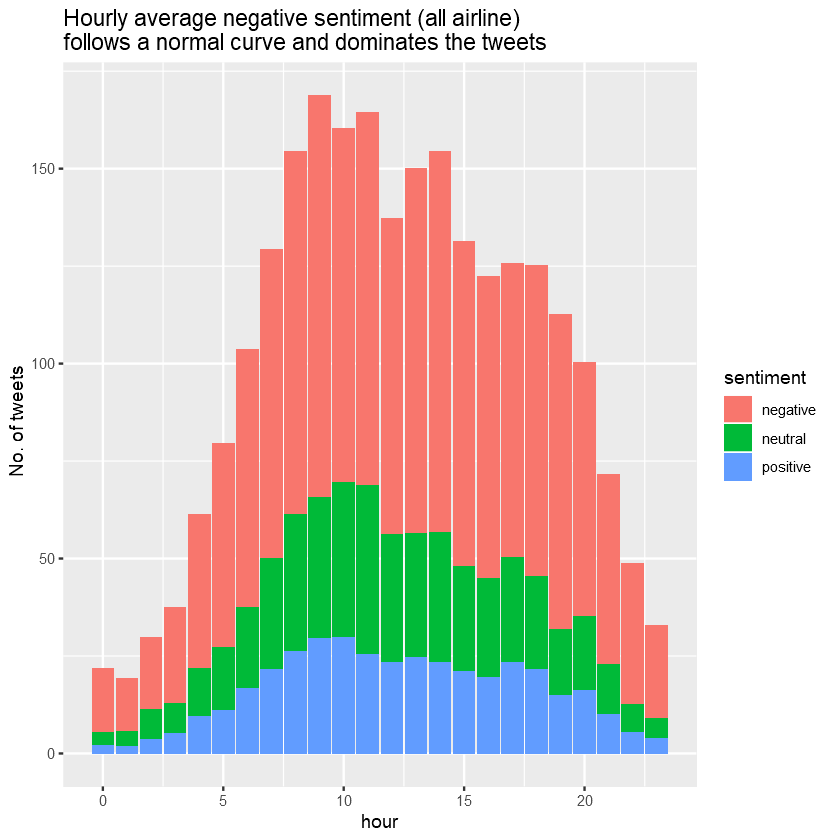

In [43]:
ggplot(aes(x = hour, y = no_of_text), data = sent_airline_hour) +
geom_bar(aes(fill = sentiment), stat = "summary", fun.y = mean) +
labs(title = "Hourly average negative sentiment (all airline) \nfollows a normal curve and dominates the tweets", y = " No. of tweets")


In [59]:
southwest_delta <- sent_airline_hour %>% dplyr::select(airline, sentiment, no_of_text) %>%
                    filter(airline == "Southwest" | airline == "Delta") %>%
                    group_by(airline, sentiment) %>%
                    mutate(count_negative = ifelse(sentiment == "negative", 
                                              sum(no_of_text), 0), 
                           count_non_negative = ifelse(sentiment == "positive" | 
                                                       sentiment == "neutral", 
                                              sum(no_of_text), 0),
                           negative_prop = round((count_negative/count_non_negative) 
                                            * 100, 2)) %>%
                           as.data.frame()

In [60]:
southwest_delta

airline,sentiment,no_of_text,count_negative,count_non_negative,negative_prop
Delta,negative,6,955,0,Inf
Southwest,negative,4,1186,0,Inf
Delta,negative,2,955,0,Inf
Southwest,negative,5,1186,0,Inf
Delta,negative,2,955,0,Inf
Southwest,negative,7,1186,0,Inf
Delta,negative,6,955,0,Inf
Southwest,negative,6,1186,0,Inf
Delta,negative,26,955,0,Inf
Southwest,negative,23,1186,0,Inf


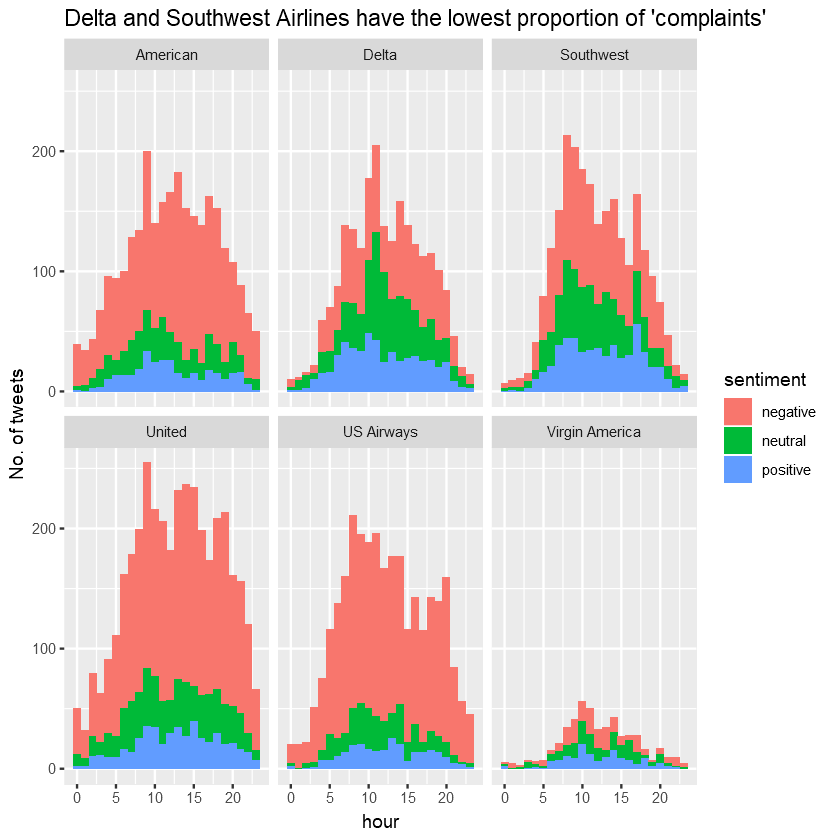

In [50]:
ggplot(aes(x = hour, y = no_of_text), data = sent_airline_hour) +
geom_bar(aes(fill = sentiment), stat = "summary", fun.y = mean) +
labs(title = "Delta and Southwest Airlines have the lowest proportion of 'complaints'", y = " No. of tweets") +
facet_wrap(~airline)

In [36]:
sent_airline_datehr <- airline_nontext_df %>% dplyr::select(date, hour, 
                                                            airline, 
                                                            sentiment) %>%
                        group_by(date, hour, sentiment,airline) %>%
                            dplyr::summarise(no_of_text = n()) %>%
                        as.data.frame()


In [37]:
sent_airline_datehr$hour_id <- seq(1, nrow(sent_airline_datehr))

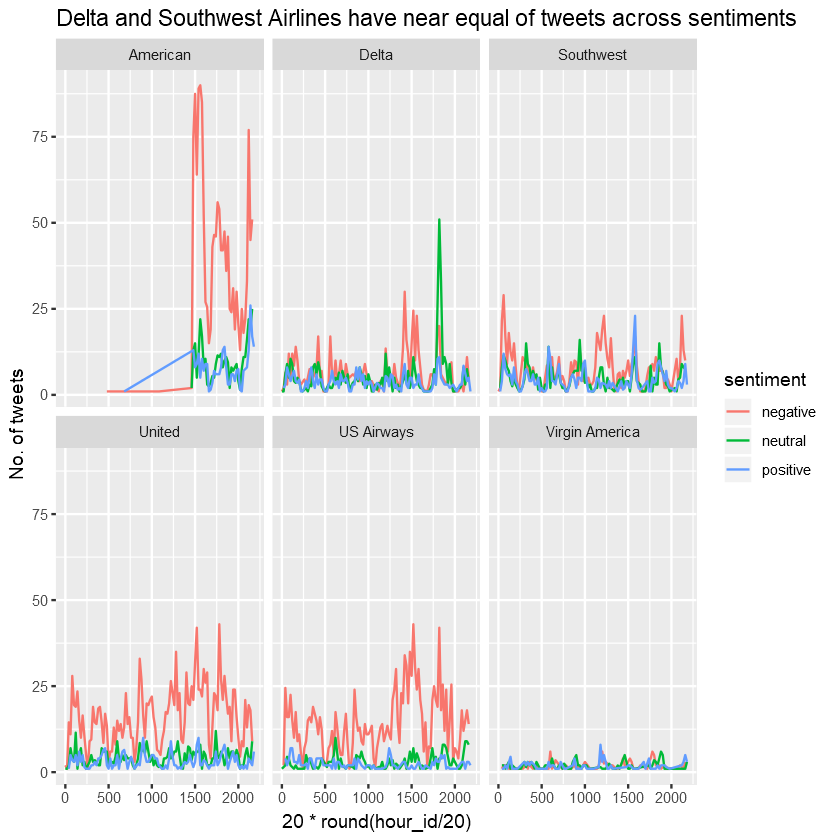

In [67]:
ggplot(aes(x = 20 * round(hour_id/20), y = no_of_text), data = sent_airline_datehr) +
geom_line(aes(color = sentiment), stat = "summary", fun.y = median) +
labs(title = "Delta and Southwest Airlines have near equal of tweets across sentiments", y = " No. of tweets") +
facet_wrap(~airline)

In [47]:
sent_airline_hr_avg <- sent_airline_datehr %>% dplyr::select(date, hour, airline, sentiment, no_of_text) %>%
                        group_by(hour, sentiment,airline) %>%
                            dplyr::summarise(avg_no_text = mean(no_of_text)) %>%
                        as.data.frame()


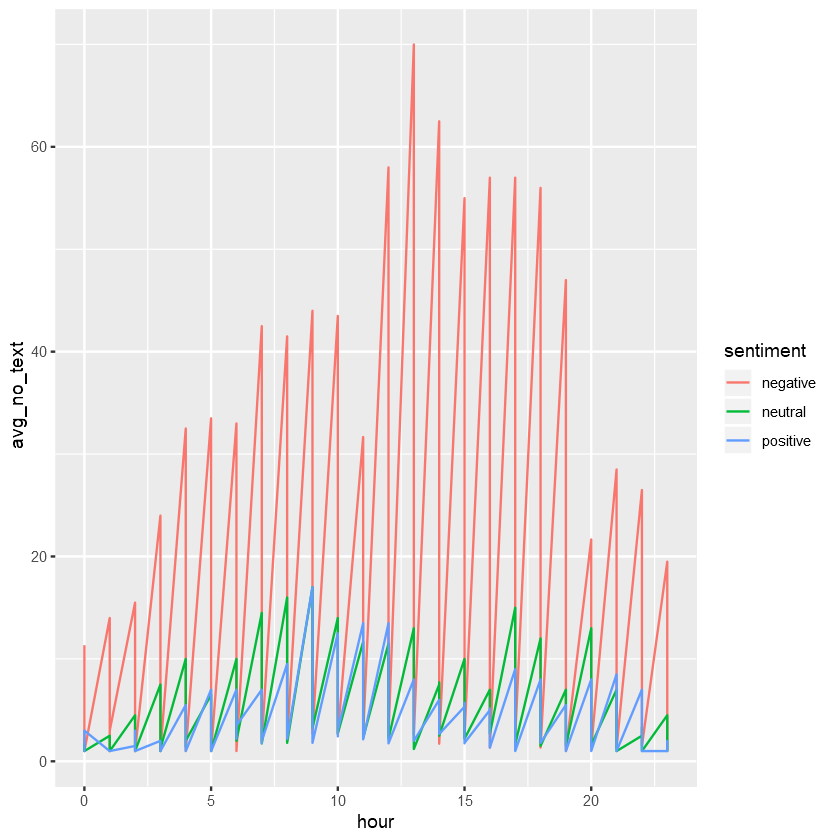

In [70]:
ggplot(aes(x = hour, y = avg_no_text), data = sent_airline_hr_avg) +
geom_line(aes(color = sentiment))

In [94]:
negreason_airline_hour <- airline_nontext_df %>% 
                            dplyr::select(hour, airline, negativereason) %>%
                            filter(negativereason != "Unknown") %>%
                            group_by(negativereason, airline, hour) %>%
                            dplyr::summarise(reason_count = n()) %>%
                        as.data.frame()


In [95]:
negreason_airline_hour_ord <- transform(negreason_airline_hour, 
                                        negativereason = 
                           reorder(negativereason, -reason_count))

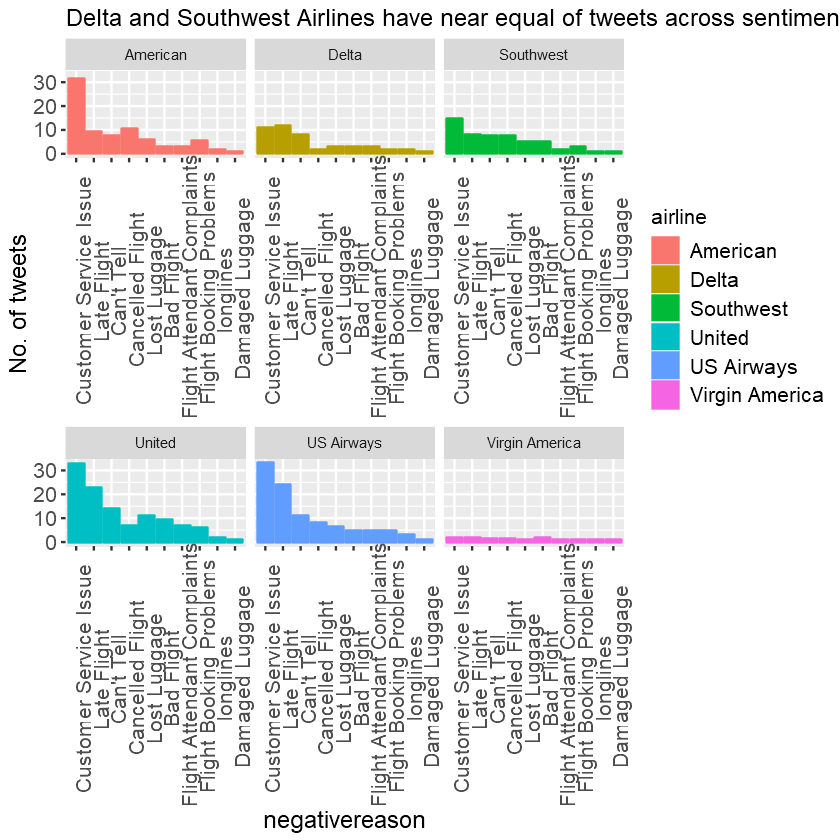

In [100]:
ggplot(aes(x = negativereason, y = reason_count), 
       data = negreason_airline_hour_ord) +
geom_bar(aes(color = airline, fill = airline), stat = "summary", fun.y = median) +
labs(title = "Customer service and Late Flight dominate the reasons for negative sentiments", y = " No. of tweets") +
facet_wrap(~airline, scales = "free_x") +
plot.format + theme(axis.text.x=element_text(angle=90))

In [132]:
negreason_airline_hour_avg <- negreason_airline_hour %>% 
                            dplyr::select(hour, airline, negativereason, 
                                          reason_count) %>%
                            filter(!(negativereason 
                                   %in% c("longlines", "Flight Booking Problems",
                                         "Damaged Luggage"))) %>%
                            group_by(negativereason, airline, hour) %>%
                            dplyr::summarise(avg_reason_count = mean(reason_count)) %>%
                        as.data.frame()

In [128]:
head(negreason_airline_hour_avg)

negativereason,hour,reason_count
Bad Flight,0,2.500000
Bad Flight,1,1.500000
Bad Flight,2,1.500000
Bad Flight,3,2.500000
Bad Flight,4,3.000000
Bad Flight,5,3.333333


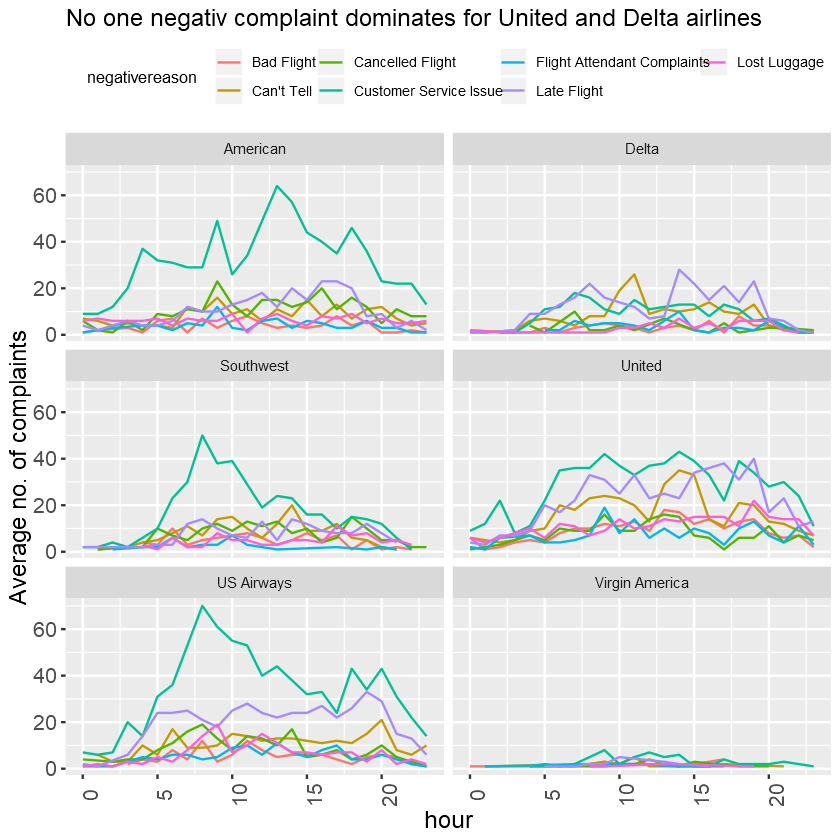

In [144]:
ggplot(aes(x = hour, y = avg_reason_count), 
       data = negreason_airline_hour_avg) +
geom_line(aes(color = negativereason)) + #, stat = "summary", fun.y = median) +
labs(title = "No one negativ complaint dominates for United and Delta airlines", y = " Average no. of complaints") +
facet_wrap(~airline, scales = "fixed", nrow = 3) +
plot.format + theme(axis.text.x=element_text(angle=90), 
                    legend.position = "top", legend.text = 
                    element_text(size=8), legend.title = element_text(size=10)
                                                                           )

In [176]:
neg_conf <- airline_nontext_df %>% dplyr::select(negativereason_confidence, airline, negativereason) %>%
            group_by(airline, negativereason) %>%
            summarise(avg_negreason_confidence = median(negativereason_confidence)) %>%
            filter(negativereason != "Unknown") %>%
            as.data.frame()

In [184]:
neg_conf_ord <- transform(neg_conf, 
                                        negativereason = 
                           reorder(negativereason, 
                                   -avg_negreason_confidence))

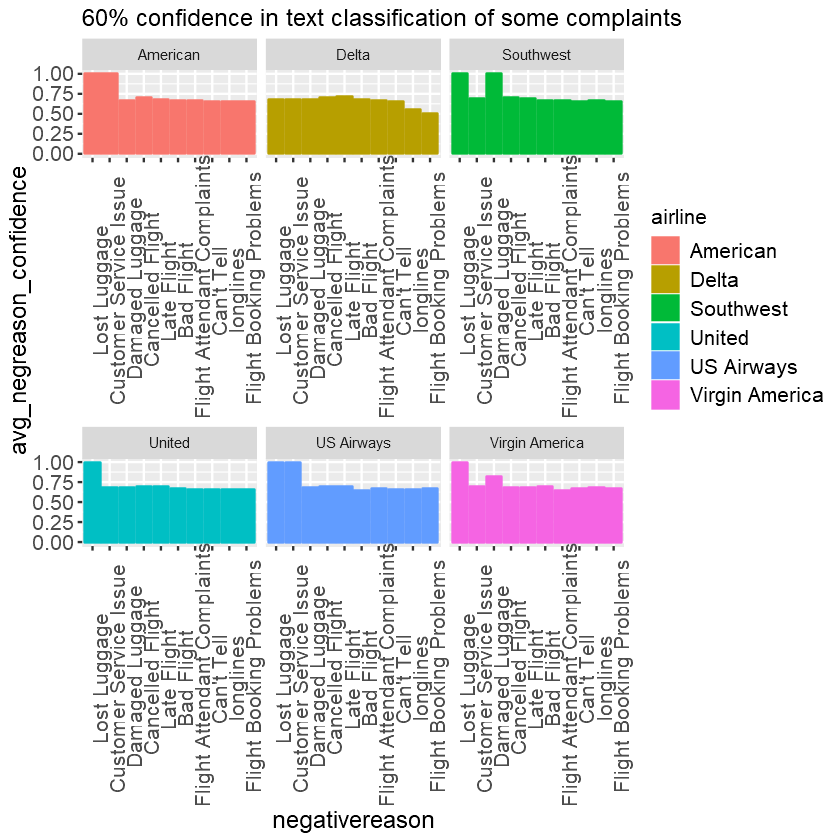

In [242]:
ggplot(aes(x = negativereason, y = avg_negreason_confidence), 
       data = neg_conf_ord) +
geom_bar(aes(color = airline, fill = airline), stat = "identity") +
labs(title = "60% confidence in text classification of some complaints") +
facet_wrap(~airline, scales = "free_x") +
plot.format + theme(axis.text.x=element_text(angle=90))

In [231]:
conf2 <- airline_nontext_df %>% dplyr::select(airline_sentiment_confidence, 
                                                  airline, negativereason) %>%
                                    group_by(airline) %>%
                                    summarise(avg_confidence = 
                                              mean(airline_sentiment_confidence, na.rm =  TRUE))

In [232]:
conf2_ord <- transform(conf2, 
                                        airline = 
                           reorder(airline, 
                                   -avg_confidence))

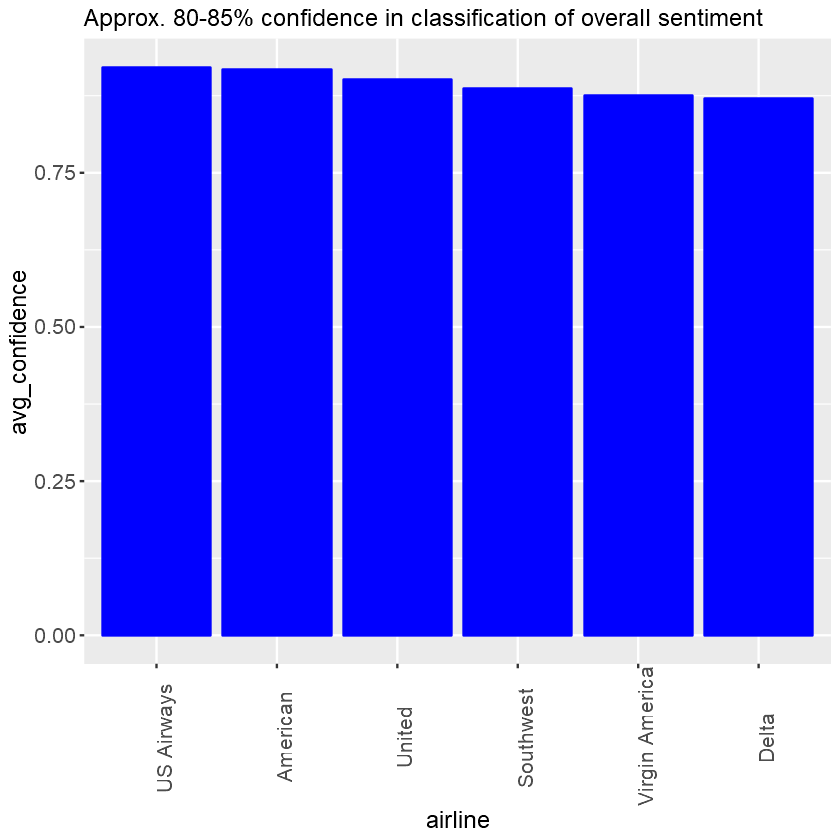

In [233]:
ggplot(aes(x = airline, y = avg_confidence), 
       data = conf2_ord) +
geom_bar(color = "blue", fill = "blue", stat = "identity") +
labs(title = "Approx. 80-85% confidence in classification of overall sentiment") +
plot.format + theme(axis.text.x=element_text(angle=90))

In [238]:
neg_conf2 <- airline_nontext_df %>% dplyr::select(negativereason_confidence, 
                                                  airline, negativereason) %>%
                                    group_by(airline) %>%
                                    summarise(avg_neg_confidence = 
                                              mean(negativereason_confidence, na.rm =  TRUE))

In [239]:
neg_conf2_ord <- transform(neg_conf2, 
                                        airline = 
                           reorder(airline, 
                                   -avg_neg_confidence))

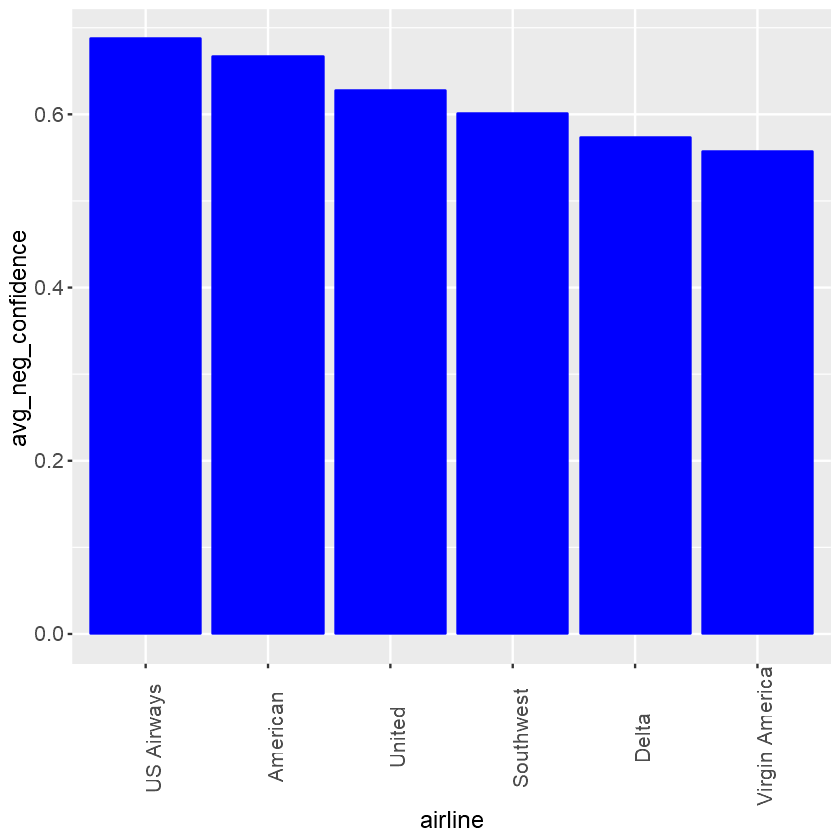

In [240]:
ggplot(aes(x = airline, y = avg_neg_confidence), 
       data = neg_conf2_ord) +
geom_bar(color = "blue", fill = "blue", stat = "identity") +
labs("Less confidence in negative sentiment text - 60-70% on average") +
plot.format + theme(axis.text.x=element_text(angle=90))

Overall the negative sentiment and the reasons for this is the most interesting aspect of ths data - outside of the actual text.
in examining this text data this exploratory data analysis (EDA) can be used a s a guideline.
Namely 
    1. Classification of negative sentiment.
    2. The confidence levels in the negative sentiment lcassification and if this canbe improved via ULMFiT
    3. The effect of hourly data and specific airline in improving sentiment classification (negative and non-negative)